In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import catboost as cb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

In [4]:
data = pd.read_csv('/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv')

### Data Manipilation or Data Wrangling

In [5]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
data.drop(2744604, inplace =True)
# data = data.drop(2744604)   can use both of them .

In [10]:
data['playersJoined']= data.groupby('matchId')['matchId'].transform('count')


In [11]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


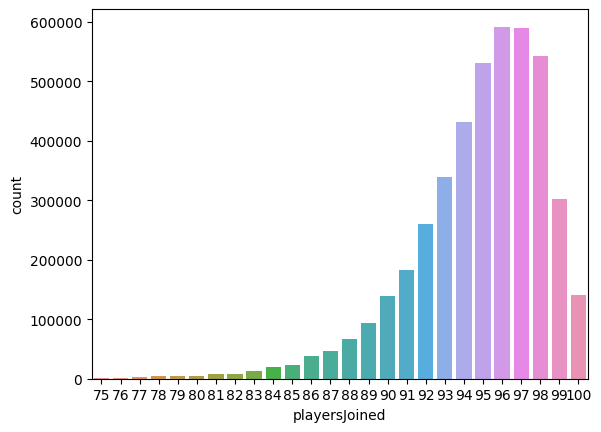

In [12]:
# We are seeing the distribution to for normalising the data as the numbers of players in each match iss not equal 
# so for equal distribution we will consider the normlization factor for numbers of kills

filtered_data = data[data['playersJoined'] >= 75]

sns.countplot(data=filtered_data, x='playersJoined')
plt.show()


In [13]:
data['Total_distance'] = data["swimDistance"] + data['walkDistance'] + data['rideDistance']

data['winWithoutKill'] = ((data['kills']>0) & (data['Total_distance']==0))


data.drop(data[data['winWithoutKill']==True].index,inplace=True)

In [14]:
data.drop(data[data['roadKills']>5].index,inplace=True)

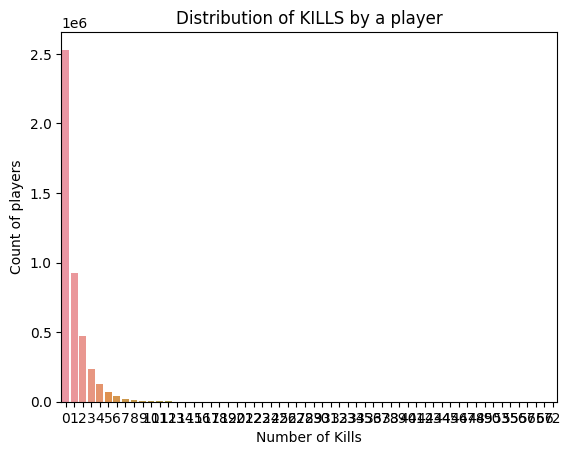

In [15]:
sns.countplot(data = data, x = data['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

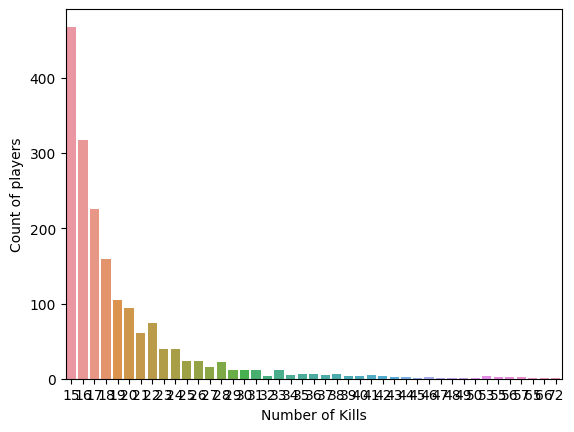

In [16]:
filter_data = data[data['kills']>=15]
sns.countplot(data = filter_data , x ='kills')
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()


In [17]:
data.drop(data[data['kills']> 20].index , inplace = True)

In [18]:
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)


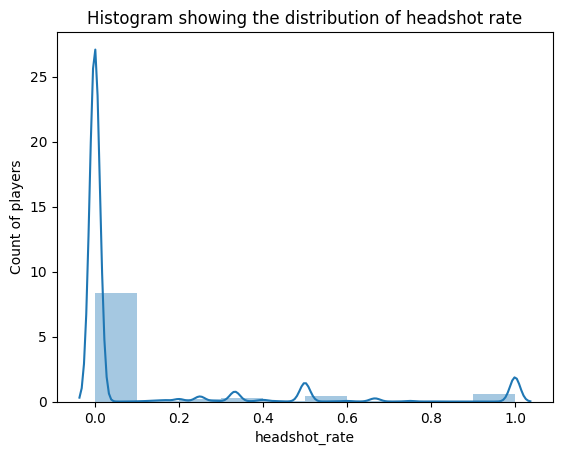

In [19]:
# plot the headshot rate distribution
sns.distplot(data['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [20]:
data[(data['headshot_rate']==1) & (data['kills']>5)].shape
data.drop(data[(data['headshot_rate']==1) & (data['kills']>5)].index, inplace =True)

## Longest shot

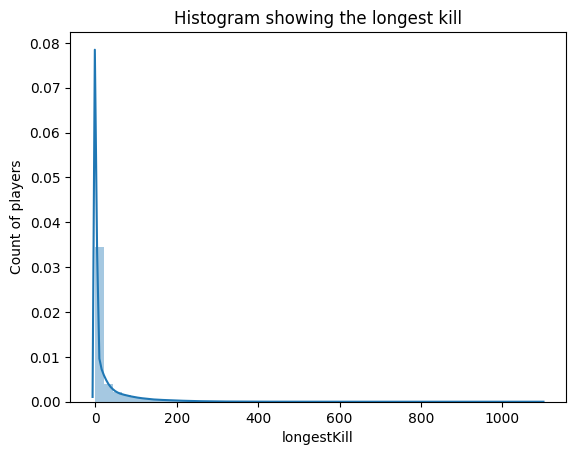

In [21]:
sns.distplot(data['longestKill'] , bins = 50).set_title('Histogram showing the longest kill')
plt.ylabel("Count of players")
plt.show()

In [22]:
data[data['longestKill']>500].shape
data.drop(data[data['longestKill']>500].index , inplace =True)

## Weapon Change

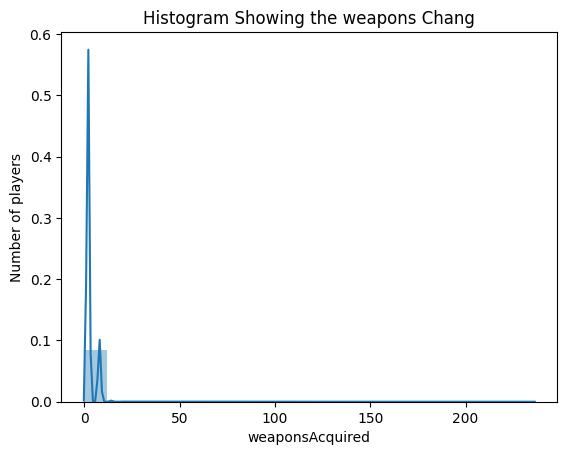

In [23]:
sns.distplot(data['weaponsAcquired'], bins =20).set_title('Histogram Showing the weapons Chang')
plt.ylabel('Number of players')
plt.show()

In [24]:
data[data['weaponsAcquired']>15].shape
data.drop(data[data['weaponsAcquired']>15].index , inplace = True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4437609 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints        

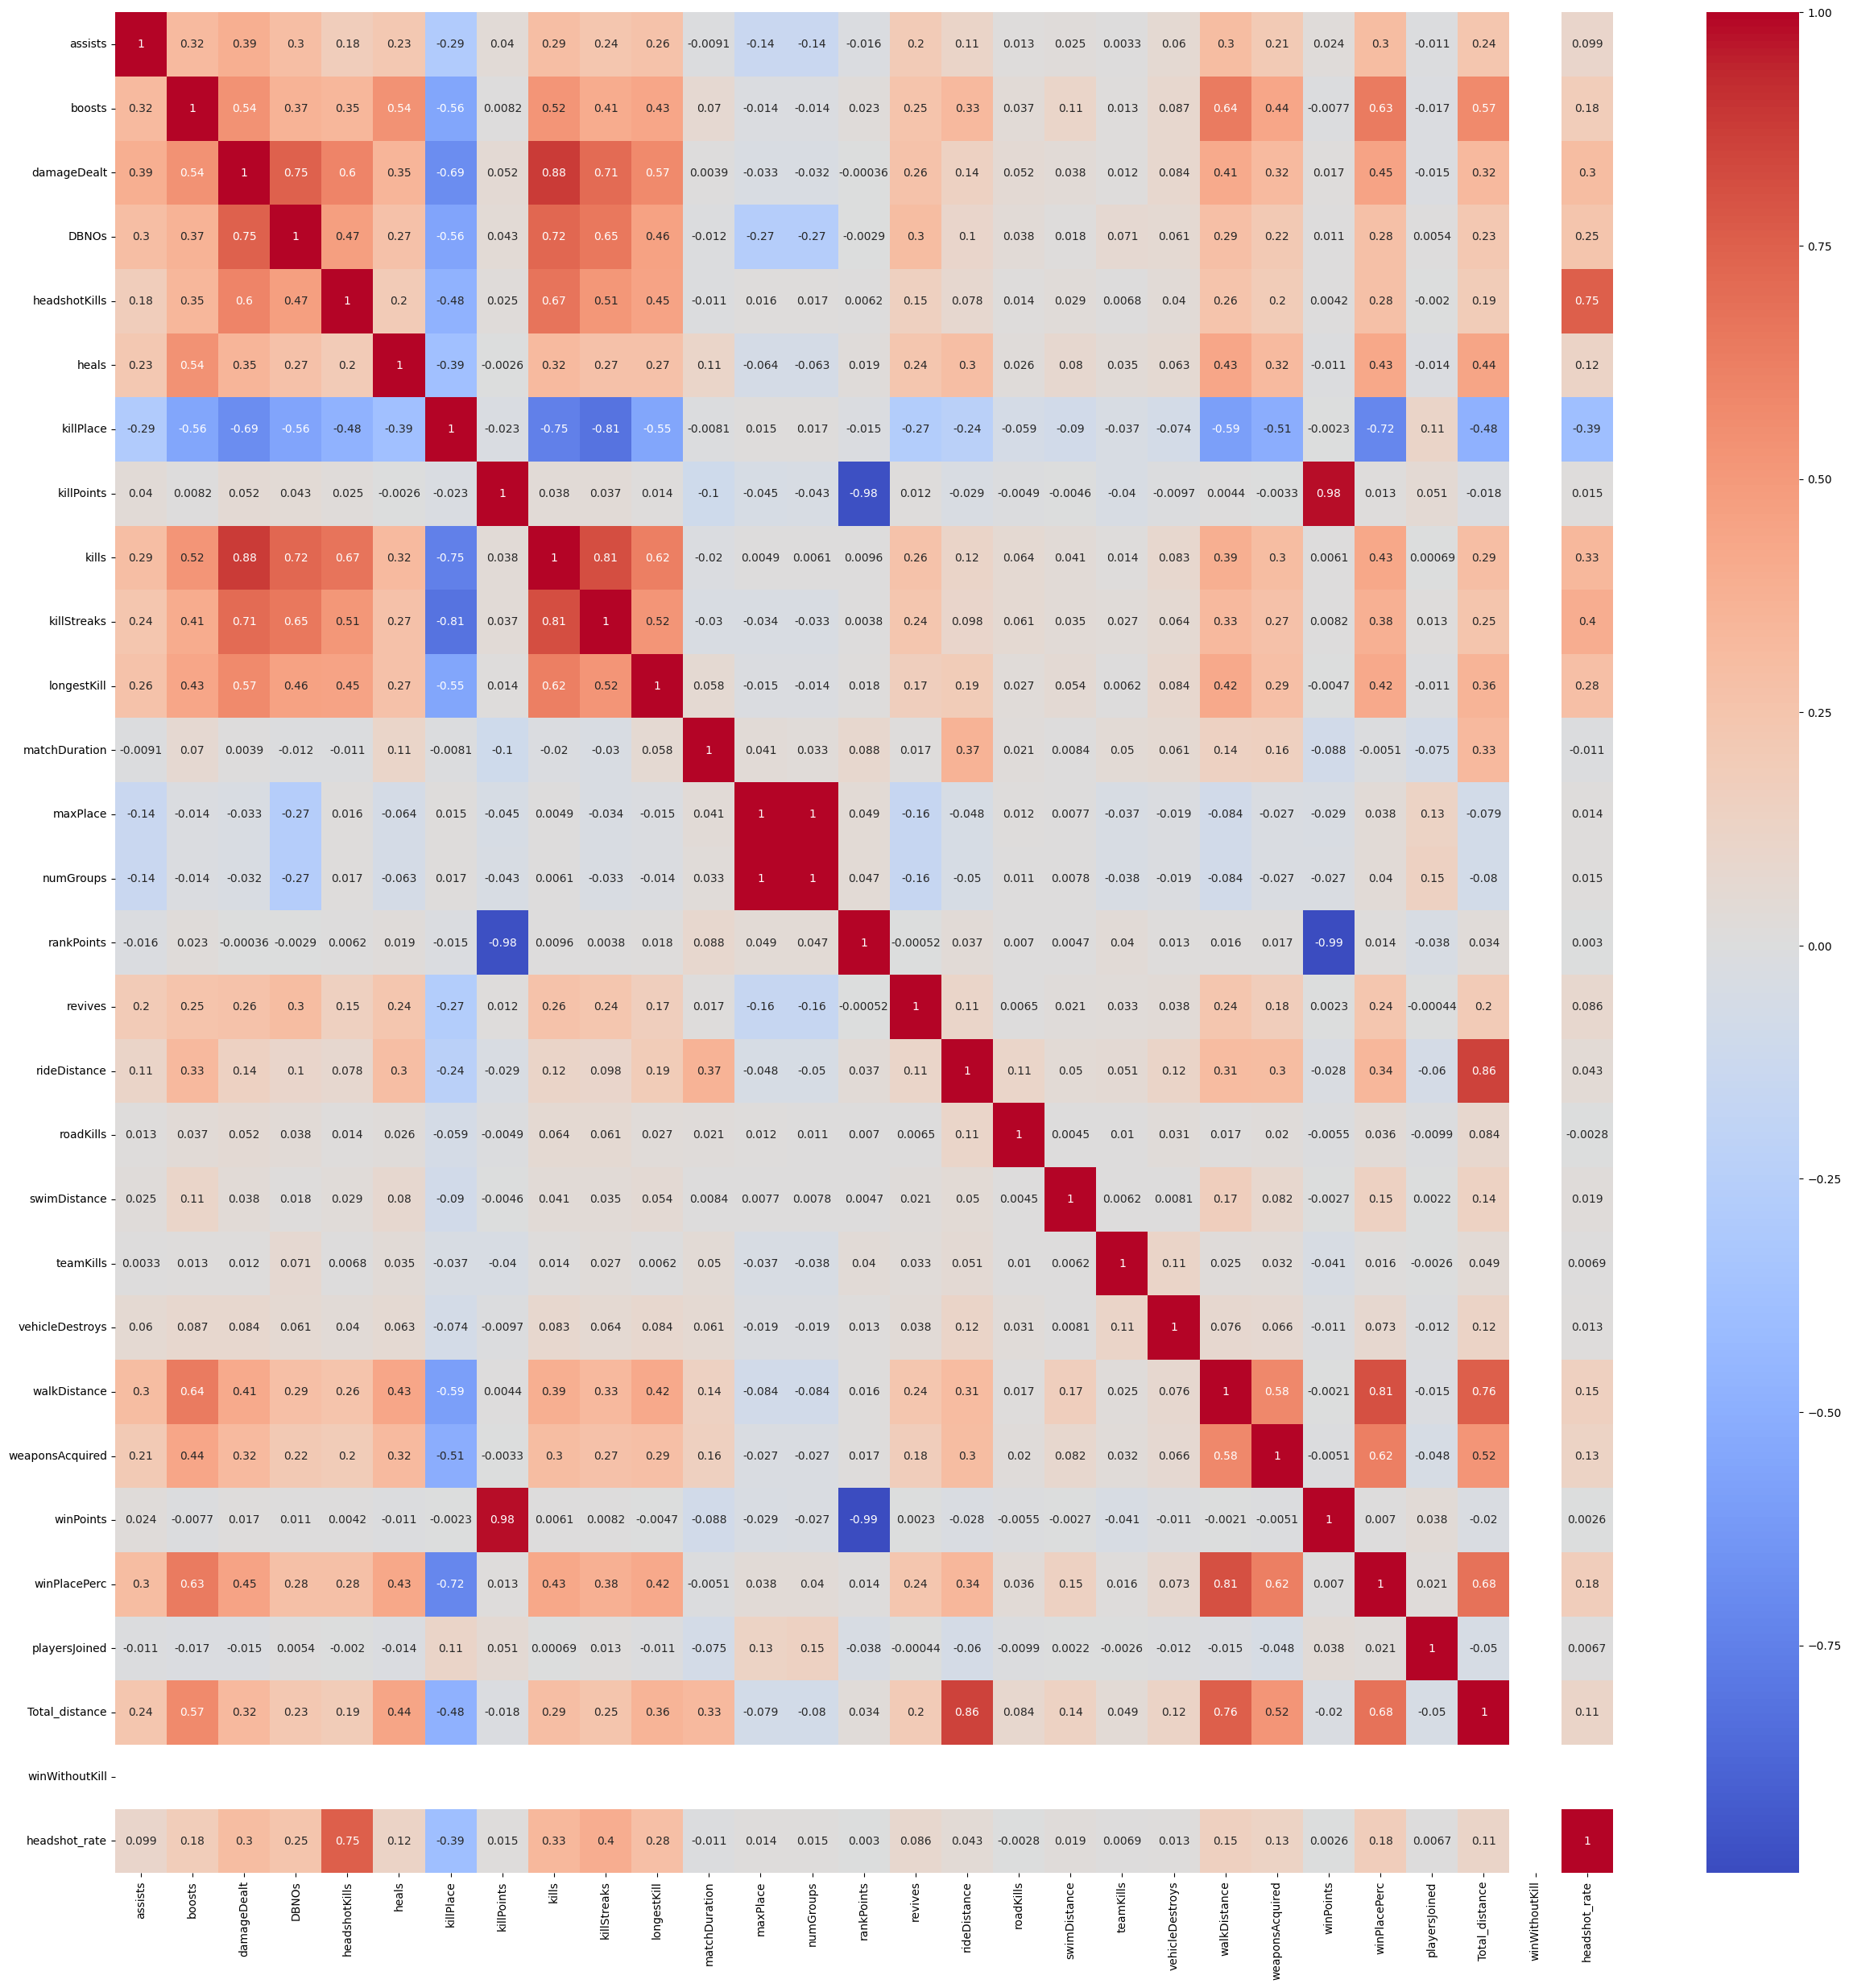

In [26]:
Dataset = data.drop(columns = ['Id' , 'groupId', 'matchId' , 'matchType'])
plt.figure(figsize=[30,30])
sns.heatmap(Dataset.corr(), annot =True , cmap ='coolwarm')
plt.show()

### Feature Enginnering 

In [27]:
normalising_factor = (100 - data['playersJoined']/100)+1

In [28]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [29]:
data_set = data.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [30]:
data_set.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,Total_distance,winWithoutKill,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


#### ML Catboost Model

In [46]:
x = data_set.drop(columns =['winPlacePerc'] , axis = 1)
y = data_set['winPlacePerc']


In [47]:
x = pd.get_dummies(x, columns=['matchType' , 'winWithoutKill'])
features = x.columns
print(features)

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'Total_distance', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'winWithoutKill_False'],
      dtype='object')


In [34]:
x = x.astype(int)
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,winWithoutKill_False
0,0,0,60,1241,0,0,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
sc = StandardScaler()
sc.fit(x)  #  It will find the mean, S.D
x = pd.DataFrame(sc.transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582723,-0.384145,0.449543,1.172543,-0.765177,-0.456538,-0.732763,-1.212394,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
1,-0.582723,-0.384145,0.340251,-0.804724,-0.765177,-0.456538,-0.775734,0.803563,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
2,-0.582723,-0.384145,-0.024055,-0.804724,-0.765177,-0.456538,0.169631,0.813066,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,-0.808872,0.0
3,-0.582723,-0.384145,0.996002,-0.804724,-0.765177,-0.456538,-0.560878,0.700389,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
4,-0.582723,-0.384145,-0.096916,-0.804724,0.647528,0.722430,2.232246,0.906736,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,2.697000,-0.405072,-0.808872,0.0


In [36]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [37]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3106326, 40) (3106326,)
(1331283, 40) (1331283,)


# Catboost Model

In [41]:
train_dataset = cb.Pool(x_train, y_train)
test_dataset = cb.Pool(x_test, y_test)

In [42]:
model = cb.CatBoostRegressor(loss_function = 'RMSE')

### Grid Search

In [44]:
grid = {'iterations':[100, 150]
       , 'learning_rate' : [0.03 ,0.01 ]
       , 'depth': [2 ,4 ,6 ,8]}

model.grid_search(grid , train_dataset)

0:	learn: 0.5483724	test: 0.5479628	best: 0.5479628 (0)	total: 378ms	remaining: 37.4s
1:	learn: 0.5335157	test: 0.5331166	best: 0.5331166 (1)	total: 557ms	remaining: 27.3s
2:	learn: 0.5191413	test: 0.5187512	best: 0.5187512 (2)	total: 710ms	remaining: 23s
3:	learn: 0.5052376	test: 0.5048586	best: 0.5048586 (3)	total: 862ms	remaining: 20.7s
4:	learn: 0.4918198	test: 0.4914485	best: 0.4914485 (4)	total: 1.01s	remaining: 19.3s
5:	learn: 0.4788104	test: 0.4784493	best: 0.4784493 (5)	total: 1.18s	remaining: 18.5s
6:	learn: 0.4661651	test: 0.4658127	best: 0.4658127 (6)	total: 1.35s	remaining: 17.9s
7:	learn: 0.4539308	test: 0.4535868	best: 0.4535868 (7)	total: 1.5s	remaining: 17.3s
8:	learn: 0.4421554	test: 0.4418221	best: 0.4418221 (8)	total: 1.66s	remaining: 16.8s
9:	learn: 0.4307499	test: 0.4304247	best: 0.4304247 (9)	total: 1.81s	remaining: 16.3s
10:	learn: 0.4196935	test: 0.4193759	best: 0.4193759 (10)	total: 1.96s	remaining: 15.9s
11:	learn: 0.4090424	test: 0.4087322	best: 0.4087322 (1

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [49]:
feature_importance_data = pd.DataFrame()
feature_importance_data['features'] = features
feature_importance_data['importance'] = model.feature_importances_

feature_importance_data = feature_importance_data.sort_values(by = ['importance'], ascending=False)

In [51]:
feature_importance_data

,features,importance
2,killPlace,42.142544
14,Total_distance,13.076292
20,traveldistance,12.152904
16,killsNorm,9.626744
19,matchDurationNorm,5.630628
4,killStreaks,5.388260
13,playersJoined,4.558058
6,numGroups,2.143769
21,healsnboosts,1.988748
0,DBNOs,1.125366


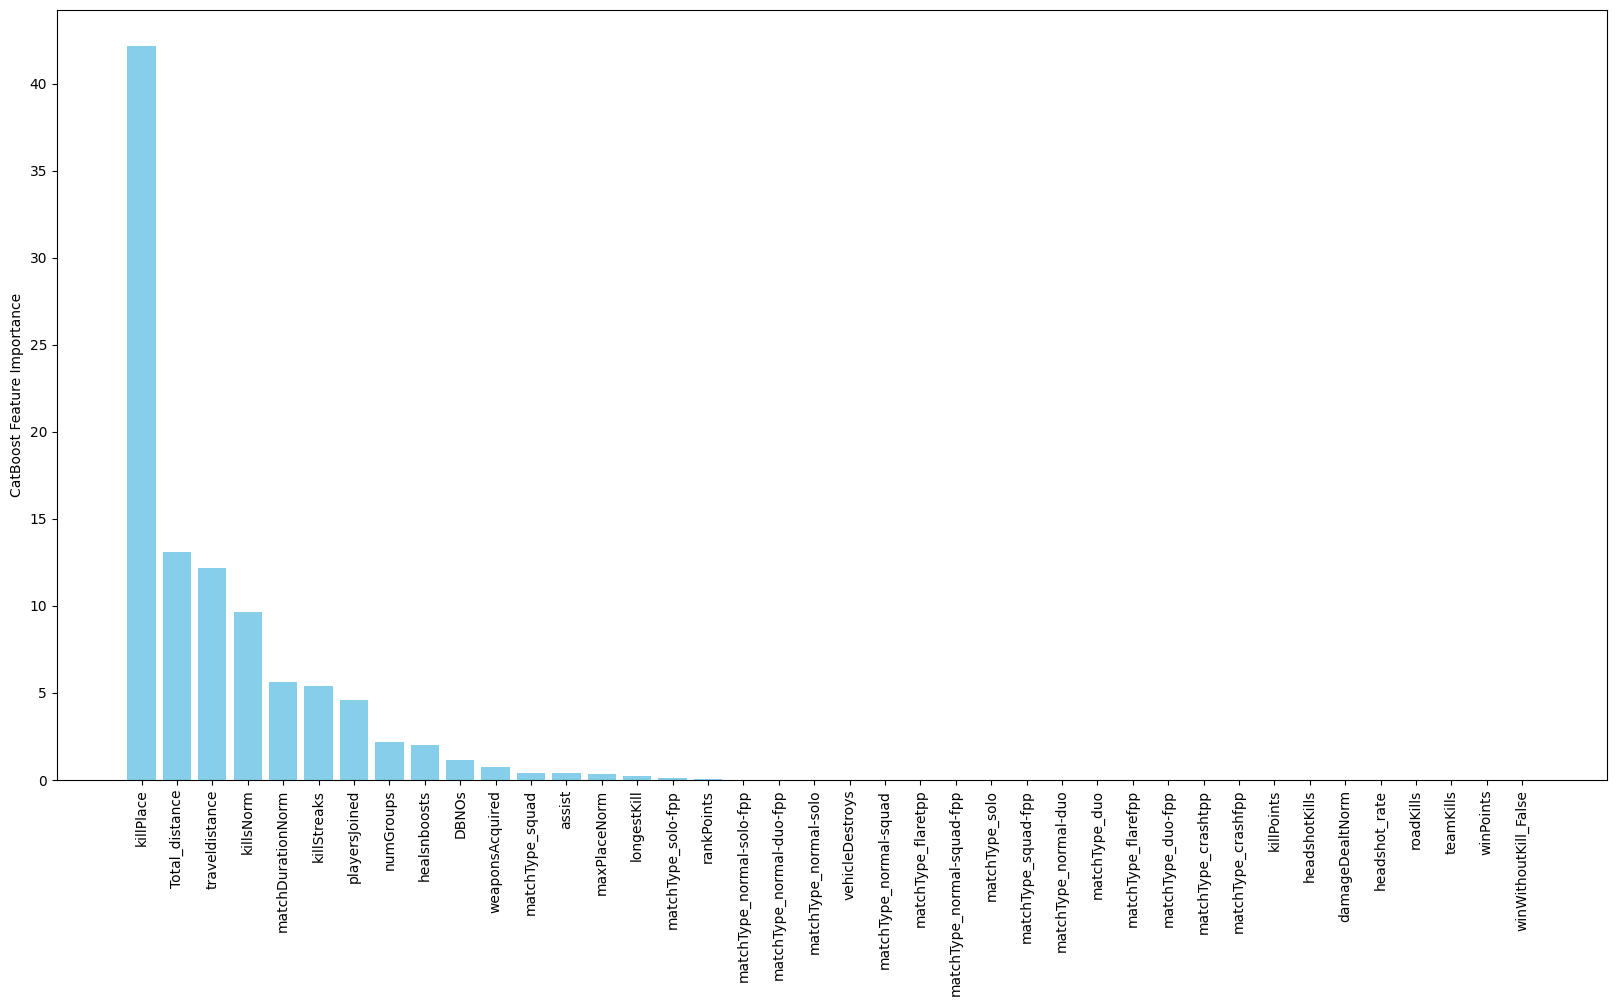

In [58]:
plt.figure(figsize=(20, 10))
plt.bar(feature_importance_data.features, feature_importance_data.importance, color='skyblue')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [60]:
pred = model.predict(x_test)

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("Testing performance")

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Testing performance
RMSE: 0.09
R2: 0.91
